In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg

%load_ext autoreload
%autoreload 2

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-3.0"

# Energy Hierarchy

    In this Script, I will compute the energy of a unit cell in different configurations. 
    
#### TO DO:

    1. Set the configuration of the unit cell
    2. Compute the energy of the unit cell
    3. Are boundaries periodic during the energy computation process?

## Coordination z = 3

In [3]:
def unit_cell_Cairo(a, dir1, dir2, dir3, dir4, dir5):
    
    """This function generates a unit cell of a Cairo lattice. The input parameter is the size of the shorter side.
    The output of the function is the (x,y) collection of the unit cells (centers) and the directions of the spins.
    I introduced another parameters that are arrays, ex: [-1,+1], that contain +1 or -1 values, and help to 
    determine the initial directions of the spins"""

    a = a
    l = 1.37*a
    torad = np.pi/180
    
    centers = np.array([[0,0,0], 
             [-l*(417/890)*np.cos(60*torad)-a/2,l*(417/890)*np.cos(30*torad),0], 
             [+l*(417/890)*np.cos(60*torad)+a/2,l*(417/890)*np.cos(30*torad),0],
             [+l*(417/890)*np.cos(60*torad)+a/2,-l*(417/890)*np.cos(30*torad),0],
             [-l*(417/890)*np.cos(60*torad)-a/2,-l*(417/890)*np.cos(30*torad),0]])*ureg.um
    
    directions =[[dir1[0]*a,dir1[1]*0,0],
                            [dir2[0]*-a*np.sin(30*torad),dir2[0]*a*np.cos(30*torad),0],
                            [dir3[0]*a*np.sin(30*torad),dir3[0]*a*np.cos(30*torad),0],
                            [dir4[0]*a*np.cos(60*torad),dir4[0]*-a*np.sin(60*torad),0],
                            [dir5[0]*a*np.cos(60*torad),dir5[0]*a*np.sin(60*torad),0]]*ureg.um
    
    return centers, directions

In [4]:
def generate_col(sp):

    particle = ice.particle(radius = 5*ureg.um,
                     susceptibility = 0.005,
                     diffusion = 0.125*ureg.um**2/ureg.s,
                     temperature = 300*ureg.K,
                     density = 1000*ureg.kg/ureg.m**3)

    trap_long = ice.trap(trap_sep = 10*ureg.um,
                       height = 0.3*ureg.pN*ureg.nm,
                       stiffness = 6e-4*ureg.pN/ureg.nm)

    trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
                       height = 0.3*ureg.pN*ureg.nm,
                       stiffness = 6e-4*ureg.pN/ureg.nm)

    traps = []

        # <In this loop, I will define which traps have to be shortere>

    for s in sp:

        a = 19.5458

        if ( s.direction[0].magnitude == a or s.direction[0].magnitude == -a or 
                s.direction[1].magnitude == a or s.direction[1].magnitude == -a ):

            traps.append(trap_short)

        else:

            traps.append(trap_long) 

    col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

    col.pad_region(10*ureg.um)
    
    return col

### Configuration 1

In [5]:
centers, directions = unit_cell_Cairo(19.5458, [+1,+1], [+1,+1], [+1,+1], [+1,-1], [+1,-1])

(-21.42652221827727,
 21.269403778514665,
 -17.845885946564504,
 24.85004005022743)

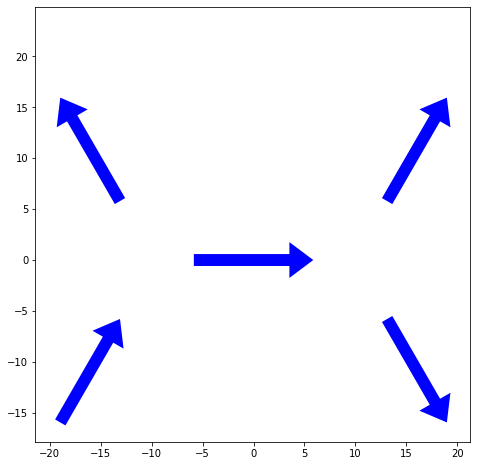

In [6]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

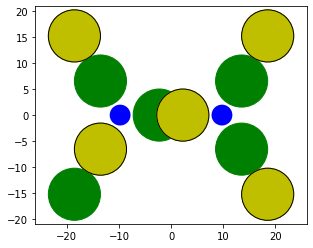

In [7]:
col1 = generate_col(sp)
col1.display()

v = ice.vertices()
v = v.colloids_to_vertices(col1)

v.display()

In [8]:
E1 = col1.calculate_energy(B = [0,0,1]*ureg.mT)

### Configuration 2

In [9]:
centers, directions = unit_cell_Cairo(19.5458, [+1,+1], [-1,+1], [-1,+1], [+1,-1], [+1,-1])

(-21.4343781402654, 21.4343781402654, -17.860545296564506, 25.008210983966297)

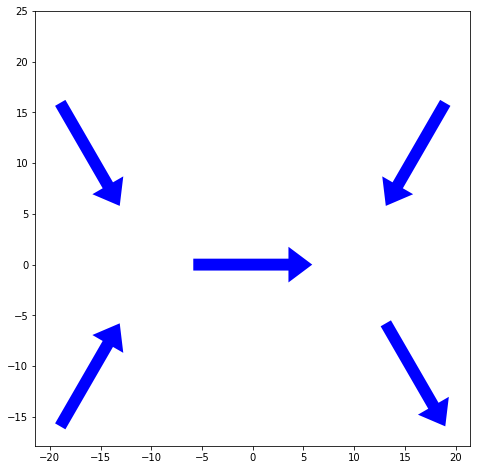

In [10]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

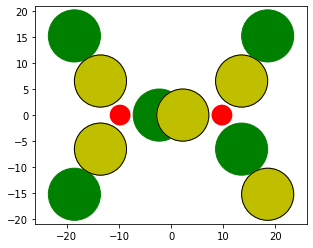

In [11]:
col2 = generate_col(sp)
col2.display()

v = ice.vertices()
v = v.colloids_to_vertices(col2)

v.display()

In [12]:
E2 =  col2.calculate_energy(B = [0,0,1]*ureg.mT)

### Configuration 3

In [13]:
centers, directions = unit_cell_Cairo(19.5458, [-1,+1], [+1,+1], [-1,+1], [+1,-1], [+1,-1])

(-21.4343781402654, 21.4343781402654, -17.860545296564506, 25.008210983966297)

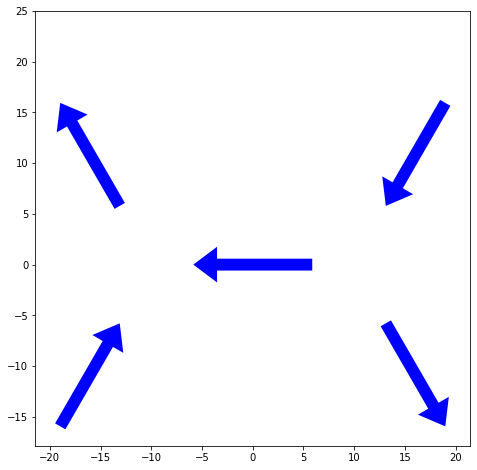

In [14]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

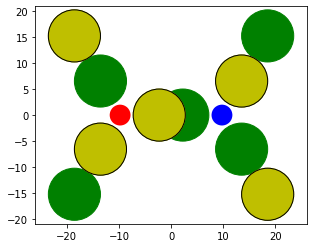

In [15]:
col3 = generate_col(sp)
col3.display()

v = ice.vertices()
v = v.colloids_to_vertices(col3)

v.display()

In [16]:
E3 = col3.calculate_energy(B = [0,0,1]*ureg.mT)

## Merge all the results of z =3

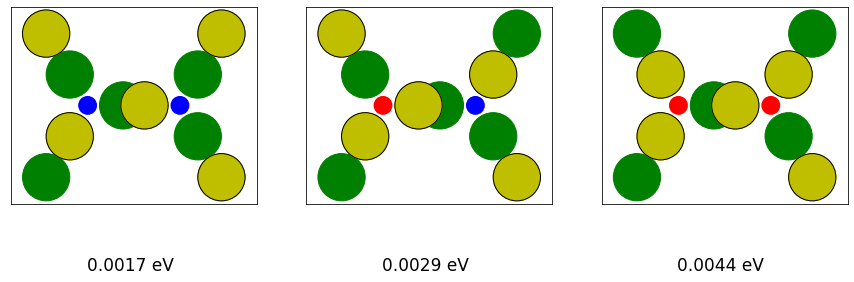

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,5))

toeV = 0.00624150913

col1.display(ax1)
v = ice.vertices()
v = v.colloids_to_vertices(col1)
v.display(ax1)
ax1.text(-10, -35, str(round(E1.magnitude*toeV,4))+" eV", size = 17)
ax1.set_xticks([])
ax1.set_yticks([])

col3.display(ax2)
v = ice.vertices()
v = v.colloids_to_vertices(col3)
v.display(ax2)
ax2.text(-10, -35, str(round(E3.magnitude*toeV,4))+" eV", size = 17)
ax2.set_xticks([])
ax2.set_yticks([])


col2.display(ax3)
v = ice.vertices()
v = v.colloids_to_vertices(col2)
v.display(ax3)
ax3.text(-10, -35, str(round(E2.magnitude*toeV,4))+" eV", size = 17)
ax3.set_xticks([])
ax3.set_yticks([])

plt.savefig(os.path.join(output,"Coordination3.png"))

## Coordination z = 4

In [18]:
def unit_cell_Cairo(a, dir1, dir2, dir3, dir4):
    
    """This function generates a unit cell of a Cairo lattice. The input parameter is the size of the shorter side.
    The output of the function is the (x,y) collection of the unit cells (centers) and the directions of the spins.""" 
    a = a
    l = 1.37*a
    torad = np.pi/180
    
    centers = np.array([[+l*(417/890)*np.cos(30*torad),l*np.cos(30*torad)+l*(473/890)*np.cos(60*torad),0], 
                     [+l*(417/890)*np.cos(60*torad)+a/2,l*(417/890)*np.cos(30*torad),0],
                    [a/2+l*np.cos(60*torad)+l*(473/890)*np.cos(30*torad),a/2+l*(417/890)*np.sin(30*torad),0],
                    [a/2+(l+l*(473/890))*np.cos(60*torad),(l+l*(473/890))*np.sin(60*torad),0]])*ureg.um
    
    directions =[[-a*dir1[0]*np.sin(60*torad),a*dir1[1]*np.cos(60*torad),0],
                            [a*dir2[0]*np.sin(30*torad),a*dir2[1]*np.cos(30*torad),0],
                            [a*dir3[0]*np.sin(60*torad),-a*dir3[1]*np.cos(60*torad),0],
                            [a**dir4[0]*np.sin(30*torad),a*dir4[0]*np.cos(30*torad),0]]*ureg.um
        
    return centers, directions

### Configuration 1

(3.740669019348827, 42.349404094034156, 3.7392472547444697, 42.3479823294298)

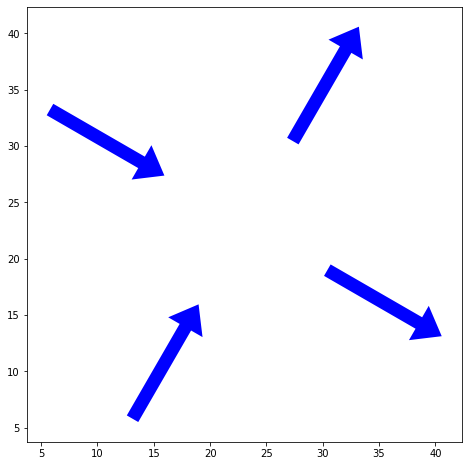

In [19]:
centers, directions = unit_cell_Cairo(19.5458, [-1,-1], [+1,+1], [+1,+1], [+1,-1])

sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

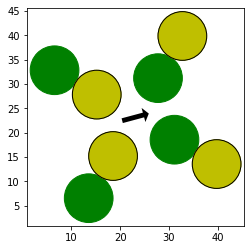

In [20]:
col1 = generate_col(sp)
col1.display()

v = ice.vertices()
v = v.colloids_to_vertices(col1)

v.display()

In [21]:
E1 = col1.calculate_energy(B = [0,0,1]*ureg.mT)
E1

0.34412716992261716 <Unit('nanometer * piconewton')>

### Configuration 2

(4.048515369348827, 42.657250444034155, 3.7392472547444697, 42.3479823294298)

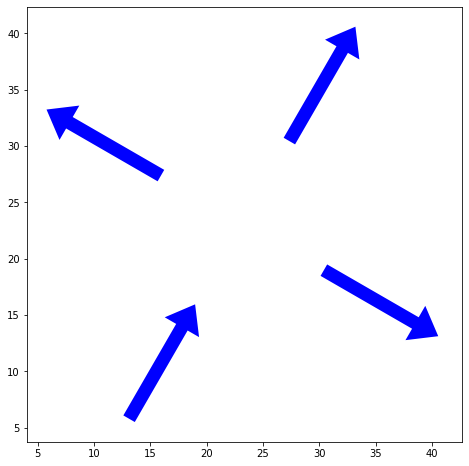

In [22]:
centers, directions = unit_cell_Cairo(19.5458, [+1,+1], [+1,+1], [+1,+1], [+1,-1])

sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

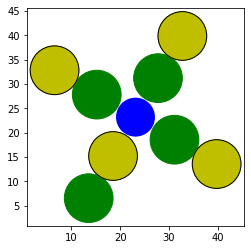

In [23]:
col2 = generate_col(sp)
col2.display()

v = ice.vertices()
v = v.colloids_to_vertices(col2)

v.display()

In [24]:
E2 = col2.calculate_energy(B = [0,0,1]*ureg.mT)
E2

0.1591159026432167 <Unit('nanometer * piconewton')>

### Configuration 3

(3.7260096693488265, 42.62597162273832, 3.7392472547444697, 42.63920920813396)

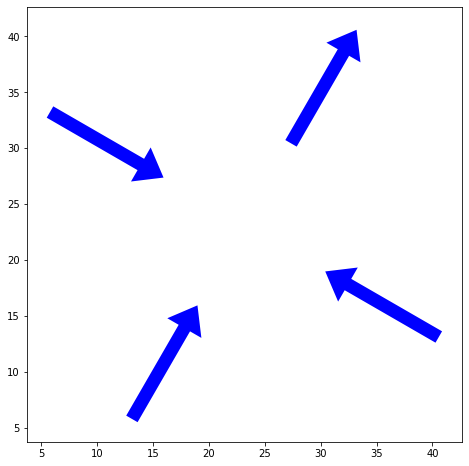

In [25]:
centers, directions = unit_cell_Cairo(19.5458, [-1,-1], [+1,+1], [-1,-1], [+1,-1])

sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

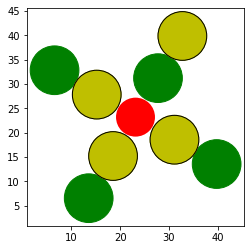

In [26]:
col3 = generate_col(sp)
col3.display()

v = ice.vertices()
v = v.colloids_to_vertices(col3)

v.display()

In [27]:
E3 = col3.calculate_energy(B = [0,0,1]*ureg.mT)
E3

0.5680871544188443 <Unit('nanometer * piconewton')>

### Configuration 4

(3.7260096693488265, 42.62597162273832, 4.047093604744471, 42.94705555813396)

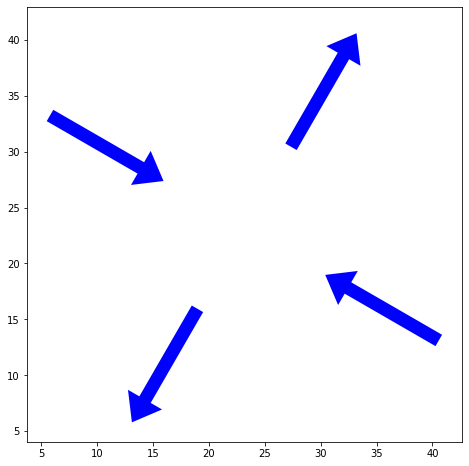

In [28]:
centers, directions = unit_cell_Cairo(19.5458, [-1,-1], [-1,-1], [-1,-1], [+1,-1])

sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

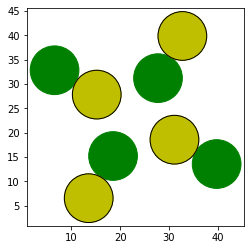

In [29]:
col4 = generate_col(sp)
col4.display()

v = ice.vertices()
v = v.colloids_to_vertices(col4)

v.display()

In [30]:
E4 = col4.calculate_energy(B = [0,0,1]*ureg.mT)
E4

0.255611220714546 <Unit('nanometer * piconewton')>

## Merge all the results of z =4

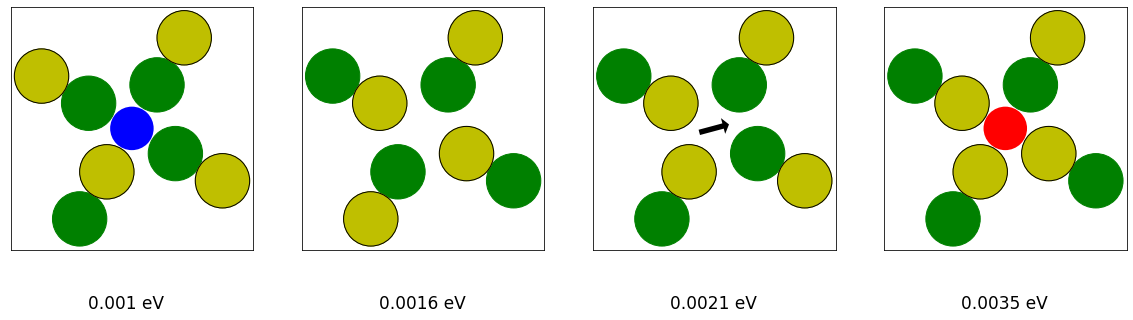

In [31]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,5))

toeV = 0.00624150913

col2.display(ax1)
v = ice.vertices()
v = v.colloids_to_vertices(col2)
v.display(ax1)
ax1.text(15, -10, str(round(E2.magnitude*toeV,4))+" eV", size = 17)
ax1.set_xticks([])
ax1.set_yticks([])

col4.display(ax2)
v = ice.vertices()
v = v.colloids_to_vertices(col4)
v.display(ax2)
ax2.text(15, -10, str(round(E4.magnitude*toeV,4))+" eV", size = 17)
ax2.set_xticks([])
ax2.set_yticks([])

col1.display(ax3)
v = ice.vertices()
v = v.colloids_to_vertices(col1)
v.display(ax3)
ax3.text(15, -10, str(round(E1.magnitude*toeV,4))+" eV", size = 17)
ax3.set_xticks([])
ax3.set_yticks([])

col3.display(ax4)
v = ice.vertices()
v = v.colloids_to_vertices(col3)
v.display(ax4)
ax4.text(15, -10, str(round(E3.magnitude*toeV,4))+" eV", size = 17)
ax4.set_xticks([])
ax4.set_yticks([])

plt.savefig(os.path.join(output,"Coordination4.png"))